In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 경고 무시
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('superstore_data.csv')
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Year_Birth -> 이상치 제거

<Axes: title={'center': 'Boxplot Year_Birth'}, xlabel='Year_Birth'>

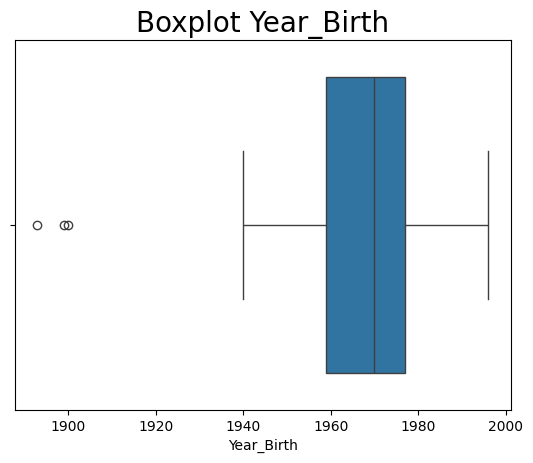

In [4]:
plt.title("Boxplot Year_Birth", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Year_Birth"])

In [5]:
df.drop(df.index[df.Year_Birth < 1920], inplace=True)

In [6]:
df.shape

(2237, 22)

# Marital_Status -> 이상치 제거

- Married: 이 값은 결혼한 상태를 나타냅니다. 즉, 해당 고객이 혼인한 상태입니다.
- Together: 이 값은 사실상 결혼 상태에 가까운 상태를 나타냅니다. 공식적으로 혼인되지 않았지만, 파트너와 함께 살고 있는 상태입니다.
- Single: 이 값은 혼자 사는 상태를 나타냅니다. 즉, 혼인하지 않은 상태입니다.
- Divorced: 이 값은 이혼한 상태를 나타냅니다. 즉, 이전에 혼인했지만 현재는 이혼한 상태입니다.
- Widow: 이 값은 남편 또는 아내가 사망하여 혼자 사는 상태를 나타냅니다.
- Alone: 이 값은 혼자 사는 상태를 나타냅니다. Single과 비슷한 의미일 수 있으나 데이터셋에서 구분되어 있는 것으로 보입니다.
- YOLO: 이 값은 "You Only Live Once"의 약자로, 유머적인 의미로 사용되는 것으로 보입니다. 데이터셋의 특정한 상황이나 오류일 가능성이 있습니다.
- Absurd: 이 값은 데이터셋에서 이상치 또는 잘못된 값으로 처리되어야 할 수 있는 값으로 보입니다. 실제로는 결혼 상태를 나타내는 유효한 값이 아닙니다.

In [7]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [8]:
# 'Alone', 'YOLO', 'Absurd'를 가진 행 추출
df[df['Marital_Status'].isin(['Alone', 'YOLO', 'Absurd'])]


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
103,492,1973,PhD,YOLO,48432.0,0,1,10/18/2012,3,322,...,4,3,42,5,7,1,6,8,0,0
104,11133,1973,PhD,YOLO,48432.0,0,1,10/18/2012,3,322,...,4,3,42,5,7,1,6,8,1,0
286,92,1988,Graduation,Alone,34176.0,1,0,12/5/2014,12,5,...,19,14,20,4,3,0,4,6,0,0
838,7660,1973,PhD,Alone,35860.0,1,1,5/19/2014,37,15,...,4,2,20,2,1,1,2,5,1,0
959,433,1958,Master,Alone,61331.0,1,1,10/3/2013,42,534,...,0,5,41,5,11,1,6,8,0,0
1068,4369,1957,Master,Absurd,65487.0,0,0,10/1/2014,48,240,...,199,0,163,3,3,5,6,2,0,0
1339,7734,1993,Graduation,Absurd,79244.0,0,0,12/19/2012,58,471,...,212,61,245,1,4,10,7,1,1,0


Alone값은 Single로 바꾸고, YOLO, Absurd 값은 삭제하겠다. 

In [9]:
# 'Alone' 값을 'Single'로 변경
df['Marital_Status'] = df['Marital_Status'].replace('Alone', 'Single')

# 'YOLO' 및 'Absurd' 값을 가진 행 삭제
df = df[~df['Marital_Status'].isin(['YOLO', 'Absurd'])]

# 변경된 데이터프레임 확인
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2233 non-null   int64  
 1   Year_Birth           2233 non-null   int64  
 2   Education            2233 non-null   object 
 3   Marital_Status       2233 non-null   object 
 4   Income               2209 non-null   float64
 5   Kidhome              2233 non-null   int64  
 6   Teenhome             2233 non-null   int64  
 7   Dt_Customer          2233 non-null   object 
 8   Recency              2233 non-null   int64  
 9   MntWines             2233 non-null   int64  
 10  MntFruits            2233 non-null   int64  
 11  MntMeatProducts      2233 non-null   int64  
 12  MntFishProducts      2233 non-null   int64  
 13  MntSweetProducts     2233 non-null   int64  
 14  MntGoldProds         2233 non-null   int64  
 15  NumDealsPurchases    2233 non-null   int64 

In [10]:
df.shape

(2233, 22)

# Income -> 이상치 제거 & null값 제거

<Axes: title={'center': 'Boxplot Income'}, xlabel='Income'>

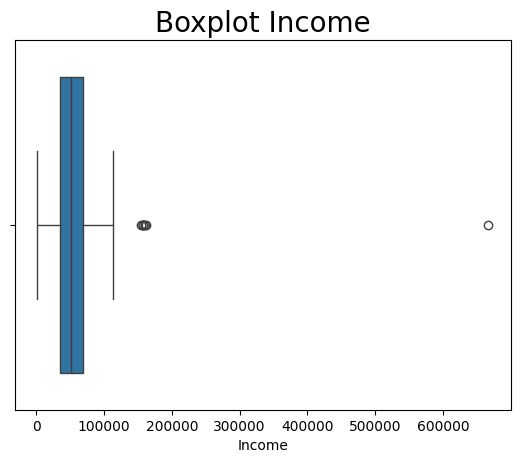

In [11]:
plt.title("Boxplot Income", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Income"])

In [12]:
df.drop(df.index[df.Income > 300000], inplace=True)

In [13]:
df['Income'].isnull().sum()

24

In [14]:
# 결측값이 있는 행 제거
df = df.dropna(subset=['Income'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2208 non-null   int64  
 1   Year_Birth           2208 non-null   int64  
 2   Education            2208 non-null   object 
 3   Marital_Status       2208 non-null   object 
 4   Income               2208 non-null   float64
 5   Kidhome              2208 non-null   int64  
 6   Teenhome             2208 non-null   int64  
 7   Dt_Customer          2208 non-null   object 
 8   Recency              2208 non-null   int64  
 9   MntWines             2208 non-null   int64  
 10  MntFruits            2208 non-null   int64  
 11  MntMeatProducts      2208 non-null   int64  
 12  MntFishProducts      2208 non-null   int64  
 13  MntSweetProducts     2208 non-null   int64  
 14  MntGoldProds         2208 non-null   int64  
 15  NumDealsPurchases    2208 non-null   int64 

# Dt_Customer (고객이 회사에 등록한 날짜)
## 6/16/2014 -> 20230101을 기준으로 얼마나 지났는지 계산

In [15]:
"""
# 6/16/2024 -> 2014-06
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer).dt.to_period('M')
sorted_dt = sorted([str(val) for val in df.Dt_Customer.unique()])
# 가장 작은 값이 2012년 1월, 가장 큰 값이 2014년 12월
df['Dt_Customer'] = df.Dt_Customer.apply(lambda val: sorted_dt.index(str(val)))
df['Dt_Customer']
"""

"\n# 6/16/2024 -> 2014-06\ndf['Dt_Customer'] = pd.to_datetime(df.Dt_Customer).dt.to_period('M')\nsorted_dt = sorted([str(val) for val in df.Dt_Customer.unique()])\n# 가장 작은 값이 2012년 1월, 가장 큰 값이 2014년 12월\ndf['Dt_Customer'] = df.Dt_Customer.apply(lambda val: sorted_dt.index(str(val)))\ndf['Dt_Customer']\n"

In [16]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
latest_date = pd.to_datetime('2023-01-01')
df['Dt_Customer'] = (latest_date - df['Dt_Customer']).dt.days
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,3121,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,3122,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,3155,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2979,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,3072,0,6,...,11,0,34,2,3,1,2,7,1,0


# id 컬럼 drop

In [17]:
df.drop('Id', axis=1, inplace=True)

# 기초 전처리 완료

In [18]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,3121,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,3122,0,464,5,...,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,3155,0,134,11,...,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,2979,0,10,0,...,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,3072,0,6,16,...,11,0,34,2,3,1,2,7,1,0


In [19]:
df.to_csv('preprocessed_superstore_data.csv', index=False)

# train dataset과 test dataset을 나눠 csv로 저장해두자

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv('preprocessed_superstore_data.csv')
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,3121,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,3122,0,464,5,...,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,3155,0,134,11,...,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,2979,0,10,0,...,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,3072,0,6,16,...,11,0,34,2,3,1,2,7,1,0


In [22]:
df.shape

(2208, 21)

In [23]:
# Feature 변수와 타겟 변수를 나누기
X = df.drop(columns=['Response'])  # 타겟 변수를 제외한 나머지 컬럼들
y = df['Response']  # 타겟 변수

# train 데이터와 test 데이터로 나누기 (타겟 변수가 불균형할 때는 stratify=y로 설정하여 클래스 비율 유지)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

# 나누어진 데이터를 합치기
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# 합쳐진 데이터를 csv 파일로 저장하기
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

In [24]:
train_data.shape

(1766, 21)

In [25]:
test_data.shape

(442, 21)